# <b>hist</b>

The `hist` function allows histogram visualizing DataFrame data.  At a minimum, the `hist` function requires the following keywords:
<ul>
<li> `df`: a pandas DataFrame</li>
<li> `x`: the name of the DataFrame column containing the x-axis data (except with 2D image data, then optional)</li>
</ul>

The y-axis will display the histogram counts for the specified data set.  

Other optional keywords for this function are described in <a href="https://endangeredoxen.github.io/fivecentplots/keyword.html">Keyword Arguments</a>.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
df.head()

Batch  Sample    Region  Value            ID
0    101       1  Alpha123    3.5     ID701223A
1    101       1  Alpha123    2.1  ID7700-1222B
2    101       1  Alpha123    3.3     ID701223A
3    101       1  Alpha123    3.2  ID7700-1222B
4    101       1  Alpha123    4.0     ID701223A

### Set theme

(Only needs to be run once)

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Simple histogram

### Vertical bars

A simple histogram with default bin size of 20:

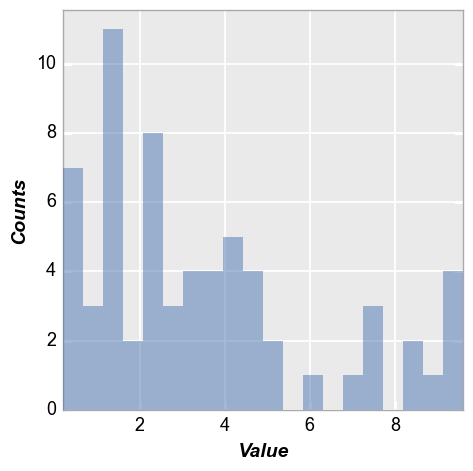

In [5]:
fcp.hist(df=df, x='Value', show=SHOW)

### Horizontal bars

Same data as above but with histogram bars oriented horizontally:

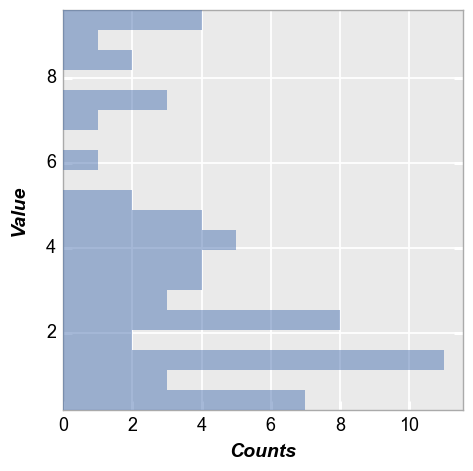

In [6]:
fcp.hist(df=df, x='Value', show=SHOW, horizontal=True)

## Legend

Add a legend:

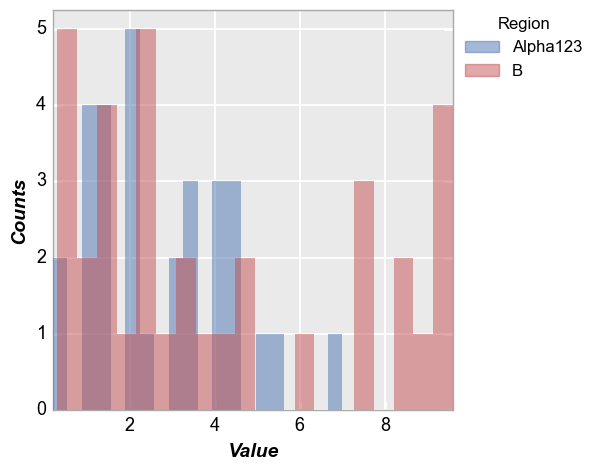

In [7]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region')

## Kernal density estimator

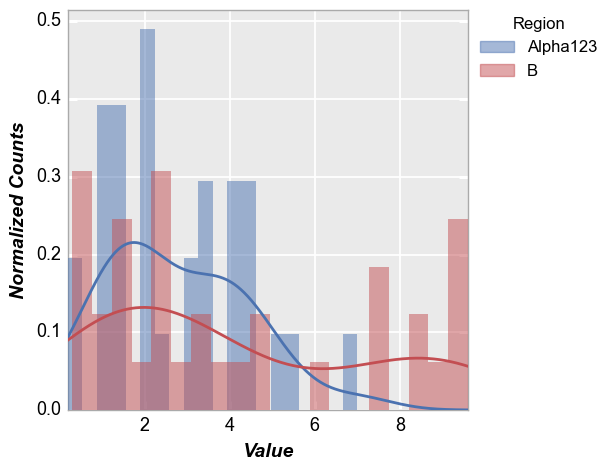

In [8]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', kde=True, kde_width=2)

## Row/column plot

Make multiple subplots with different row/column values:

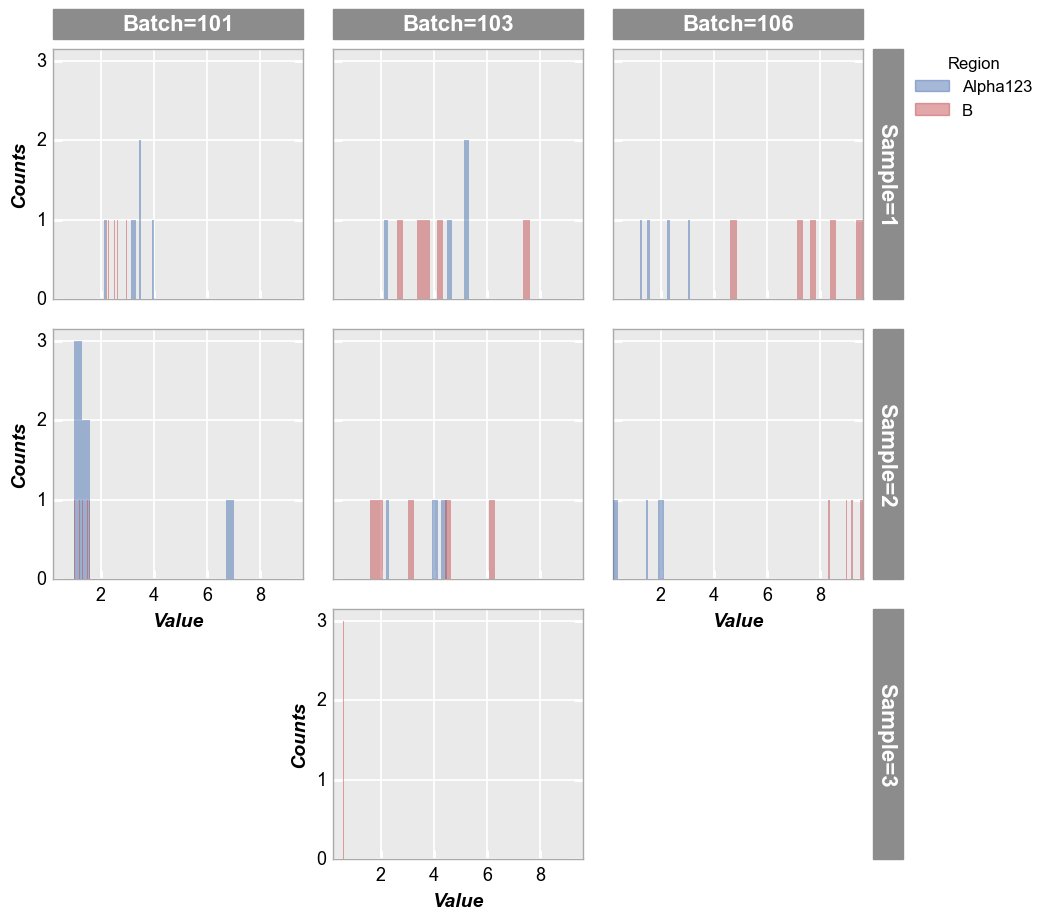

In [ ]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', col='Batch', row='Sample', ax_size=[250, 250])

## Wrap plot

### By column values

In [ ]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', wrap='Batch', ax_size=[250, 250], horizontal=True) 

### By column names

In [ ]:
df['Value*2'] = 2*df['Value']
df['Value*3'] = 3*df['Value']
fcp.hist(df=df, x=['Value', 'Value*2', 'Value*3'], wrap='x', show=SHOW, ncol=3, ax_size=[250, 250])

## Images

<b>fivecentplots</b> ``hist`` plots can also be used for histograms of pixel values from images, with and without color plane separation

### Mono
Consider a light blue color patch.  First we ignore any CFA and just consider the blue color channel from the RGB image:

<img src="https://imgs.michaels.com/MAM/assets/1/D730994AF28E498A909A1002BBF38107/img/16F309E5F1CF4742B4AACD8E0CCF08E0/D203087S_1.jpg?fit=inside|1024:1024" width="200">

In [ ]:
# Read an image and convert to raw using only the blue color channel
import imageio
url = 'https://imgs.michaels.com/MAM/assets/1/D730994AF28E498A909A1002BBF38107/img/16F309E5F1CF4742B4AACD8E0CCF08E0/D203087S_1.jpg?fit=inside|1024:1024'
imgr = imageio.imread(url)
img = fcp.utilities.rgb2bayer(imgr, 'bbbb')
img

In [ ]:
fcp.hist(img, markers=False, ax_scale='logy', ax_size=[600, 400], line_width=2, show=SHOW)

Next we convert the RGB into a Bayer-like image with RGGB CFA and we can see the histogram of the discrete color channels:

In [ ]:
img = fcp.utilities.rgb2bayer(imgr, 'rggb')
img

In [ ]:
fcp.hist(img, markers=False, ax_scale='logy', ax_size=[600, 400], show=SHOW, legend='Plane', cfa='rggb', line_width=2, colors=fcp.BAYER)